<a href="https://colab.research.google.com/github/Skommireddy/Projects-IDS/blob/main/HW3/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
pip install mysql-connector-python

     |████████████████████████████████| 37.6 MB 2.1 MB/s 


In [3]:
import mysql.connector as sql

In [4]:
from tabulate import tabulate

In [5]:
import pandas as pd

In [6]:
db_connection = sql.connect(host='208.109.18.154', database='ids3db', user='ids3', password='Ehf1826')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM Life_Expectancy')

table_rows = db_cursor.fetchall()

dataFrame = pd.DataFrame(table_rows)

print(tabulate(dataFrame, headers='keys', tablefmt='fancy_grid'))

╒═════╤══════════════════════════╤══════╤═══════╤═════╤═══════╤══════════════╤═══════╤═══════╤══════════════╤════════════╤═══════╕
│     │ 0                        │    1 │     2 │   3 │     4 │            5 │     6 │     7 │            8 │          9 │    10 │
╞═════╪══════════════════════════╪══════╪═══════╪═════╪═══════╪══════════════╪═══════╪═══════╪══════════════╪════════════╪═══════╡
│   0 │ Afghanistan              │ 2010 │ 58.8  │ 279 │  0.01 │    79.6794   │ 16.7  │  9.2  │    553.329   │    2883167 │  9.2  │
├─────┼──────────────────────────┼──────┼───────┼─────┼───────┼──────────────┼───────┼───────┼──────────────┼────────────┼───────┤
│   1 │ Afghanistan              │ 2011 │ 59.2  │ 275 │  0.01 │     7.09711  │ 17.2  │  7.87 │     63.5372  │    2978599 │  9.5  │
├─────┼──────────────────────────┼──────┼───────┼─────┼───────┼──────────────┼───────┼───────┼──────────────┼────────────┼───────┤
│   2 │ Afghanistan              │ 2012 │ 59.5  │ 272 │  0.01 │    78.1842   │ 17.6

In [7]:
dataFrame.columns = ['Country', 'Year', 'Life_Expectancy', 'Adult_Mortality', 'Alcohol', 'Percentage_Expenditure', 'BMI', 'Total_Expenditure', 'GDP', 'Population', 'Schooling']

print(tabulate(dataFrame, headers='keys', tablefmt='fancy_grid'))

╒═════╤══════════════════════════╤════════╤═══════════════════╤═══════════════════╤═══════════╤══════════════════════════╤═══════╤═════════════════════╤══════════════╤══════════════╤═════════════╕
│     │ Country                  │   Year │   Life_Expectancy │   Adult_Mortality │   Alcohol │   Percentage_Expenditure │   BMI │   Total_Expenditure │          GDP │   Population │   Schooling │
╞═════╪══════════════════════════╪════════╪═══════════════════╪═══════════════════╪═══════════╪══════════════════════════╪═══════╪═════════════════════╪══════════════╪══════════════╪═════════════╡
│   0 │ Afghanistan              │   2010 │             58.8  │               279 │      0.01 │                79.6794   │ 16.7  │                9.2  │    553.329   │      2883167 │        9.2  │
├─────┼──────────────────────────┼────────┼───────────────────┼───────────────────┼───────────┼──────────────────────────┼───────┼─────────────────────┼──────────────┼──────────────┼─────────────┤
│   1 │ Afghani

In [8]:
print(dataFrame)

         Country  Year  Life_Expectancy  Adult_Mortality  Alcohol  \
0    Afghanistan  2010             58.8              279     0.01   
1    Afghanistan  2011             59.2              275     0.01   
2    Afghanistan  2012             59.5              272     0.01   
3    Afghanistan  2013             59.9              268     0.01   
4    Afghanistan  2014             59.9              271     0.01   
..           ...   ...              ...              ...      ...   
851     Zimbabwe  2011             54.9              464     6.00   
852     Zimbabwe  2012             56.6              429     6.09   
853     Zimbabwe  2013             58.0              399     6.39   
854     Zimbabwe  2014             59.2              371     6.50   
855     Zimbabwe  2015             67.0              336     4.30   

     Percentage_Expenditure   BMI  Total_Expenditure         GDP  Population  \
0                 79.679367  16.7               9.20  553.328940     2883167   
1          

In [9]:
from scipy.stats import pearsonr

In [10]:
data1 = dataFrame['Adult_Mortality']
data2 = dataFrame['Life_Expectancy']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: -0.74874


In [11]:
data1 = dataFrame['Life_Expectancy']
data2 = dataFrame['Alcohol']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.43643


In [12]:
data1 = dataFrame['Life_Expectancy']
data2 = dataFrame['BMI']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.52181


In [13]:
data1 = dataFrame['Life_Expectancy']
data2 = dataFrame['GDP']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.46580


In [14]:
data1 = dataFrame['Life_Expectancy']
data2 = dataFrame['Total_Expenditure']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.23535


In [15]:
data1 = dataFrame['Life_Expectancy']
data2 = dataFrame['Schooling']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.80360


In [16]:
dataFrame.corr(method='pearson')

,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
Year,1.000000,0.061117,-0.031863,-0.119668,0.010027,0.051678,0.017370,-0.013141,0.023245,0.060425
Life_Expectancy,0.061117,1.000000,-0.748740,0.436430,0.392763,0.521813,0.235350,0.465800,-0.033489,0.803600
Adult_Mortality,-0.031863,-0.748740,1.000000,-0.226645,-0.249771,-0.385627,-0.133540,-0.297913,0.024512,-0.552934
Alcohol,-0.119668,0.436430,-0.226645,1.000000,0.385273,0.273628,0.248901,0.417047,-0.030778,0.535175
Percentage_Expenditure,0.010027,0.392763,-0.249771,0.385273,1.000000,0.215357,0.269932,0.903112,-0.032929,0.385916
BMI,0.051678,0.521813,-0.385627,0.273628,0.215357,1.000000,0.169084,0.271465,-0.074993,0.501125
Total_Expenditure,0.017370,0.235350,-0.133540,0.248901,0.269932,0.169084,1.000000,0.254954,-0.073902,0.253229
GDP,-0.013141,0.465800,-0.297913,0.417047,0.903112,0.271465,0.254954,1.000000,-0.028964,0.479461
Population,0.023245,-0.033489,0.024512,-0.030778,-0.032929,-0.074993,-0.073902,-0.028964,1.000000,-0.048146
Schooling,0.060425,0.803600,-0.552934,0.535175,0.385916,0.501125,0.253229,0.479461,-0.048146,1.000000


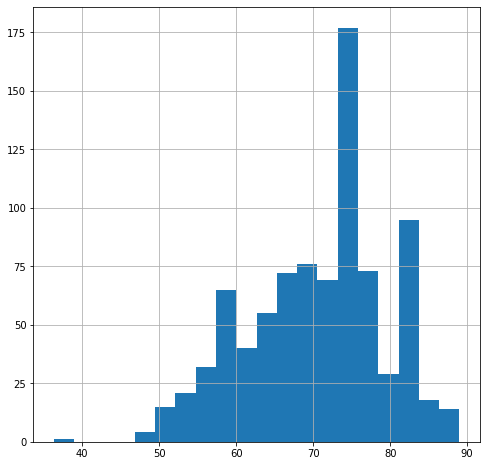

In [17]:
import matplotlib.pyplot as plt

dataFrame['Life_Expectancy'].hist(bins=20, figsize=(8,8))
plt.show()

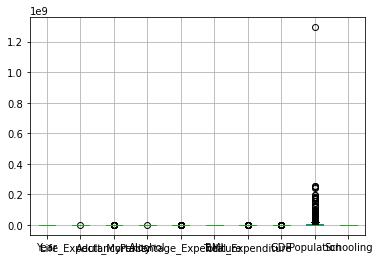

In [18]:
dataFrame.boxplot()

In [19]:
from sklearn.linear_model import LinearRegression

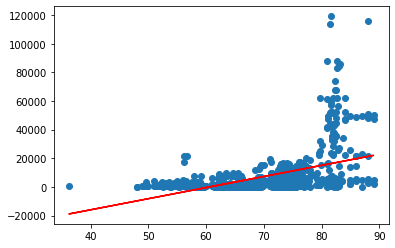

In [20]:
X = dataFrame.loc[:, 'Life_Expectancy'].values.reshape(-1,1)
Y = dataFrame.loc[:, 'GDP'].values.reshape(-1,1)
# Create the model
LRmodel = LinearRegression()  
# Perform linear regression
LRmodel.fit(X, Y)   
# Make predictions
Y_pred = LRmodel.predict(X)  
# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [21]:
# The equation of the line is:

print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

The slope:  [[775.5812164]]
The intercept:  [-46977.10215729]


In [22]:
tempDF = dataFrame.copy()

tempDF['Predicted_Score'] = Y_pred

tempDF

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling,Predicted_Score
0,Afghanistan,2010,58.8,279,0.01,79.679367,16.7,9.20,553.328940,2883167,9.2,-1372.926633
1,Afghanistan,2011,59.2,275,0.01,7.097109,17.2,7.87,63.537231,2978599,9.5,-1062.694146
2,Afghanistan,2012,59.5,272,0.01,78.184215,17.6,8.52,669.959000,3696958,9.8,-830.019781
3,Afghanistan,2013,59.9,268,0.01,73.219243,18.1,8.13,631.744976,31731688,9.9,-519.787295
4,Afghanistan,2014,59.9,271,0.01,73.523582,18.6,8.18,612.696514,327582,10.0,-519.787295
...,...,...,...,...,...,...,...,...,...,...,...,...
851,Zimbabwe,2011,54.9,464,6.00,63.750530,29.9,6.31,839.927936,14386649,10.1,-4397.693377
852,Zimbabwe,2012,56.6,429,6.09,92.602336,3.3,6.69,955.648466,1471826,9.8,-3079.205309
853,Zimbabwe,2013,58.0,399,6.39,10.666707,3.8,6.88,111.227396,155456,10.4,-1993.391606
854,Zimbabwe,2014,59.2,371,6.50,10.822595,31.3,6.44,127.474620,15411675,10.3,-1062.694146


In [23]:
# Error analysis


from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

MSE:  171240626.5147822
R2:  0.21696944076733016


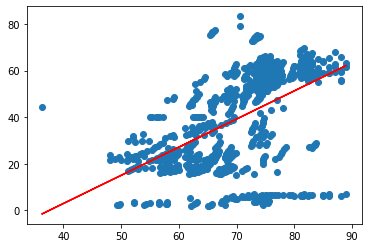

In [24]:
X = dataFrame.loc[:, 'Life_Expectancy'].values.reshape(-1,1)
Y = dataFrame.loc[:, 'BMI'].values.reshape(-1,1)
# Create the model
LRmodel = LinearRegression()  
# Perform linear regression
LRmodel.fit(X, Y)   
# Make predictions
Y_pred = LRmodel.predict(X)  
# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [25]:
# The equation of the line is:

print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

The slope:  [[1.20873956]]
The intercept:  [-45.38340432]


In [26]:
tempDF = dataFrame.copy()

tempDF['Predicted_Score'] = Y_pred

tempDF

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling,Predicted_Score
0,Afghanistan,2010,58.8,279,0.01,79.679367,16.7,9.20,553.328940,2883167,9.2,25.690482
1,Afghanistan,2011,59.2,275,0.01,7.097109,17.2,7.87,63.537231,2978599,9.5,26.173978
2,Afghanistan,2012,59.5,272,0.01,78.184215,17.6,8.52,669.959000,3696958,9.8,26.536600
3,Afghanistan,2013,59.9,268,0.01,73.219243,18.1,8.13,631.744976,31731688,9.9,27.020095
4,Afghanistan,2014,59.9,271,0.01,73.523582,18.6,8.18,612.696514,327582,10.0,27.020095
...,...,...,...,...,...,...,...,...,...,...,...,...
851,Zimbabwe,2011,54.9,464,6.00,63.750530,29.9,6.31,839.927936,14386649,10.1,20.976398
852,Zimbabwe,2012,56.6,429,6.09,92.602336,3.3,6.69,955.648466,1471826,9.8,23.031255
853,Zimbabwe,2013,58.0,399,6.39,10.666707,3.8,6.88,111.227396,155456,10.4,24.723490
854,Zimbabwe,2014,59.2,371,6.50,10.822595,31.3,6.44,127.474620,15411675,10.3,26.173978


In [27]:
# Error analysis


from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

MSE:  308.0115076992883
R2:  0.2722887605705314


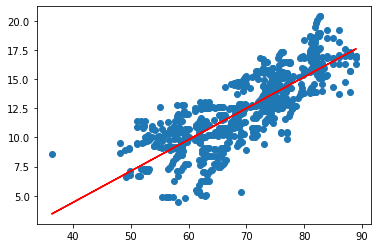

In [28]:
X = dataFrame.loc[:, 'Life_Expectancy'].values.reshape(-1,1)
Y = dataFrame.loc[:, 'Schooling'].values.reshape(-1,1)
# Create the model
LRmodel = LinearRegression()  
# Perform linear regression
LRmodel.fit(X, Y)   
# Make predictions
Y_pred = LRmodel.predict(X)  
# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [29]:
dataFrame.shape

(856, 11)

In [30]:
# The equation of the line is:

print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

The slope:  [[0.26891758]]
The intercept:  [-6.32472614]


In [31]:
tempDF = dataFrame.copy()

tempDF['Predicted_Score'] = Y_pred

tempDF

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling,Predicted_Score
0,Afghanistan,2010,58.8,279,0.01,79.679367,16.7,9.20,553.328940,2883167,9.2,9.487627
1,Afghanistan,2011,59.2,275,0.01,7.097109,17.2,7.87,63.537231,2978599,9.5,9.595195
2,Afghanistan,2012,59.5,272,0.01,78.184215,17.6,8.52,669.959000,3696958,9.8,9.675870
3,Afghanistan,2013,59.9,268,0.01,73.219243,18.1,8.13,631.744976,31731688,9.9,9.783437
4,Afghanistan,2014,59.9,271,0.01,73.523582,18.6,8.18,612.696514,327582,10.0,9.783437
...,...,...,...,...,...,...,...,...,...,...,...,...
851,Zimbabwe,2011,54.9,464,6.00,63.750530,29.9,6.31,839.927936,14386649,10.1,8.438849
852,Zimbabwe,2012,56.6,429,6.09,92.602336,3.3,6.69,955.648466,1471826,9.8,8.896009
853,Zimbabwe,2013,58.0,399,6.39,10.666707,3.8,6.88,111.227396,155456,10.4,9.272493
854,Zimbabwe,2014,59.2,371,6.50,10.822595,31.3,6.44,127.474620,15411675,10.3,9.595195


In [32]:
# Error analysis


from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))


MSE:  3.1290579258859803
R2:  0.6457722941519741
